In [146]:
import pandas as pd
import numpy as np

df = pd.read_csv("netflix_data.csv")

#clean which don't have rating
rating_df = df.dropna(subset=['rating'])

#rating with counts
rating_counts = rating_df.groupby('rating')['rating'].count()

#Most common rating
highest_rating = rating_counts[rating_counts==rating_counts.max()].index


df.info()
print(df.head())
df.tail()
#Movies released in 2015
movies_release_in_2015 = len(df[df['release_year']==2015])


#Movies or tv shows released in india
df.dropna(subset=['country'], inplace=True)
items_release_in_india = df[df['country'].str.lower()=='india'].pivot_table(index='release_year', columns='type', values='title', aggfunc='count')
items_release_in_india =items_release_in_india.fillna(0).astype('int')
items_release_in_india['Total Releasd'] = items_release_in_india['Movie']+items_release_in_india['TV Show']

#Top 5 countries of producing netflix content
top_countries = df.groupby('country')['title'].count().sort_values(ascending=False).head()
top_countries

# For each rating, show how many movies and how many TV shows exist.
rating_wise_count = rating_df.pivot_table(index='rating', columns='type', values='title', aggfunc='count')
rating_wise_count = rating_wise_count.fillna(0).astype('int')
rating_wise_count.reset_index(inplace=True)

# Find which year had the most releases overall.
year_of_highest_release = df.groupby('release_year')['title'].count().sort_values(ascending=False).reset_index()
year_of_highest_release.iloc[0,0]



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3   

np.int64(2018)

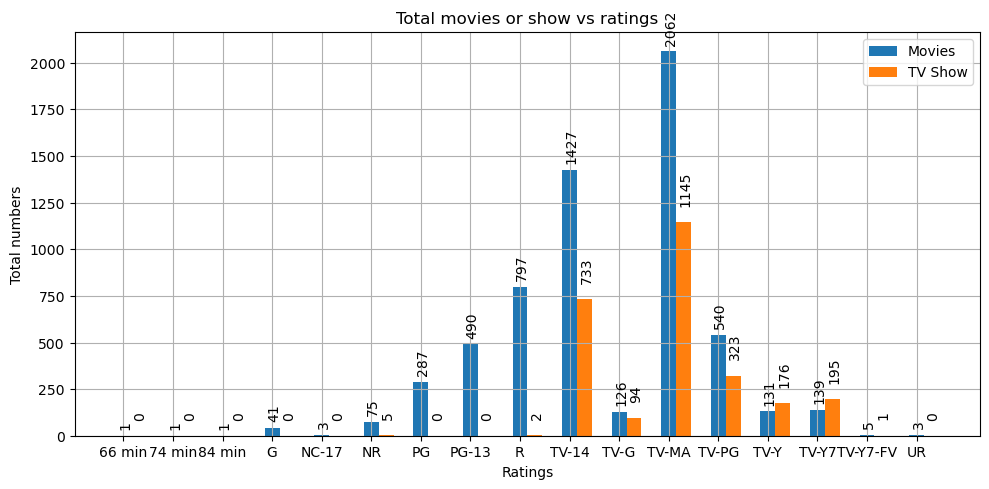

In [182]:
# 🎨 LEVEL 4 – Visualization (Matplotlib + Seaborn)
import matplotlib.pyplot as plt

# Plot a bar chart showing how many titles exist per rating.
ratings = rating_wise_count['rating']
movies = rating_wise_count['Movie']
shows = rating_wise_count['TV Show']
x = np.arange(len(ratings))
width=0.30
plt.figure(figsize=(10,5)) 
plt.bar(x, movies, width=width,label="Movies")
plt.bar(x+width, shows, width=width,label="TV Show")
plt.xlabel('Ratings')
plt.ylabel('Total numbers')
plt.title('Total movies or show vs ratings')
for i in x:
    plt.text(i-0.10, movies[i]+50, movies[i], rotation=90)
    plt.text(i+width-0.10, shows[i]+100, shows[i], rotation=90)
plt.tight_layout()
plt.grid()
plt.xticks(x, ratings)
plt.legend()
plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


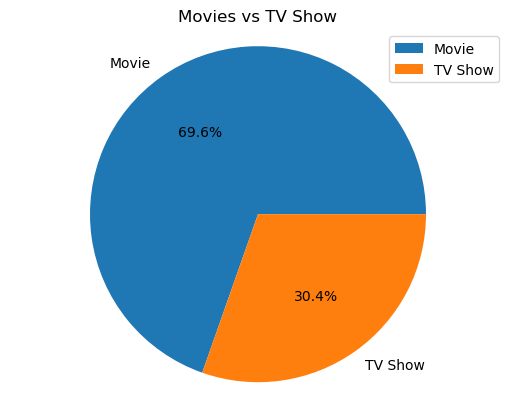

In [228]:
# Draw a pie chart showing the percentage of Movies vs TV Shows.
df2 = pd.read_csv("netflix_data.csv")
df2.info()

per = df2.groupby('type')['title'].count().reset_index()
per.rename(columns={'title':'count'}, inplace=True)
per['count']
plt.pie(per['count'], labels=per['type'], autopct="%1.1f%%")
plt.title('Movies vs TV Show')
plt.axis('equal')
plt.legend()
plt.show()